## hw4 due 11:59pm Thu 19 March

#### Submit steps 1-8 for a grade of up to 100 points or submit steps 7 and 8 for a grade of up to 130 points. 

### Instructions (like whiteboard version of 3 March, but with more words) 

1. Choose 3 distributions from 3 different families (they can't all be normal or uniform or beta or whatever). <br> Choosing a dist is the same as choosing a pdf, so let's call them $f_1, f_2, f_3$.    
2. (10 points) From each $f_i$ generate a sample of $n=12$ data points.  Call the samples $dat_1, dat_2, dat_3$.  <br>
Code like this:  **dati = stats.f_i.rvs(..., size = 12)**, where $f_i$ and ... depend on your dist.  
3.  For $dat_1$ use **putaboxonit(x, h, ...)**  to produce an estimate $\hat{f_1}$ of the mother pdf $f_1$. Plot it to see how it looks. Experiment with different choices of $h$ to see how it changes.   Nothing to turn in here, just experiment. <br> 
We did this in class with $n=8$ from $beta(5,2)$. We made 8 calls to **putaboxonit(x, h)**, we got 8 boxes, we plotted them on top of each other and it was a mess, then we ADDED the boxes together and called the result **yout**. The plot of **yout** looked like a distribution; another way to say it is $\hat f =$ **yout** is an estimate of the mother pdf $f$ which was $beta(5,2)$.  Here I'm asking you to produce (and plot) **yout** using $dat_1$ and different values of $h$. Each **yout** is an estimate of your pdf $f_1$.  
4.  (30 points) From your experiments, keep 3 versions of $\hat f_1$:  one where $h$ is too small (undersmoothed, boxes don't overlap much), one where $h$ is too large (oversmoothed, boxes overlap like crazy), and one where $h$ looks just right.  Let's call them $\hat f_1^u, \hat f_1^o, \hat f_1^*$.  Deliver a single plot showing these three curves AND $f_1$ and the data $dat_1$ all together.  Legends are good on plots like these. 
5.  (10 points) Repeat steps 3 and 4 for $dat_2$ and $f_2$. 
6.  (10 points) Repeat steps 3 and 4 for $dat_3$ and $f_3$. 
7.  (30 points) Repeat steps 2 - 6 with $n=40$ instead of $n=12$.  
8.  (10 points) There's no reason we have to use boxes;  all of this could work with a different shape.  Think a little and write a function called **putabumponit(x,h,...)**.  The ... means there might be other inputs.  The whiteboard instructions said "write and deploy".  By "deploy" I mean use your function enough to show that it works.  A plot might be good. 
9.  (120 points) Complete steps 2 - 7 using **putabumponit()** instead of **putaboxonit()**.  


In [1]:
# the usual starting block
# added pandas
import numpy as np 
%matplotlib inline   
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import math
from scipy import stats
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  
# asking jupyter to show all output on execution, not just the final value
# other options:  instead of "all"  use "last_expr" or "none"

In [4]:
F1 = stats.norm.rvs(0,1, size = 12)
F1

array([ 0.73689202, -1.68844243, -0.11408744, -0.04972536,  1.73598429,
        0.10554761,  0.38828875, -0.85748186,  1.77603626,  0.13957427,
       -0.95408002,  0.45075321])

In [5]:
F2 = stats.beta.rvs(3,5, size = 12)
F2

array([0.47429527, 0.1579942 , 0.268996  , 0.47448399, 0.41507208,
       0.20340038, 0.43651196, 0.42533562, 0.27206657, 0.54792271,
       0.43226874, 0.17473862])

In [10]:
a = 1
F3 = stats.gamma.rvs(a, size = 12)
F3

array([0.98054562, 0.84552582, 0.36995571, 0.32999546, 1.18236669,
       0.03342569, 0.07196056, 1.45468877, 0.9394867 , 0.42304434,
       1.41208404, 0.87853669])

## Functions in python -- the basic template
Python functions have this structure: 

**def** *functionname*(arg1, arg2, ...)**\:** <br>
&ensp;&ensp;&ensp;    """ docstring """ <br>
&ensp;&ensp;&ensp;        code<br>
&ensp;&ensp;&ensp;        more code <br>
&ensp;&ensp;&ensp;        ...<br>
&ensp;&ensp;&ensp;        excellent code <br>
&ensp;&ensp;&ensp;        *value* = ... <br>
&ensp;&ensp;&ensp;        **return** *value*<br>


## Example:  write a function to make python's unif.rvs() function work like R's runif()

In [5]:
def myrunif(n, a, b ):
    """ reparameterizing python's uniform random number generator 
        to make it behavelike R's runif() function
        n = number of random numbes to generate
        a,b = left and right boundaries of uniform dist
    """
    leftboundary  = a
    width  = b - a
    val = stats.uniform.rvs(loc = leftboundary, scale = width, size = n)
    return val 

## test the function

In [6]:
myrunif(5,0,1)
myrunif(5, 10, 20)
myrunif(5000, 0, 100).min()
bigvec = myrunif(5000000, 0, 100)
bigvec.max()

array([0.66803012, 0.26593754, 0.20346573, 0.57646232, 0.08046408])

array([18.33946218, 19.78245239, 16.4835032 , 14.89025972, 13.60947016])

0.022842526776767347

99.99998401294076

### generate a random value from beta(5,2)
### on Tuesday we got .406 so we use x = .406 below 

In [7]:
stats.beta.rvs(5, 2, size =1)

array([0.5766009])

Plotting a box centered on x = .406, width = 2h, area = 1. 
Later we turn this into a function.  

(0.0, 4)

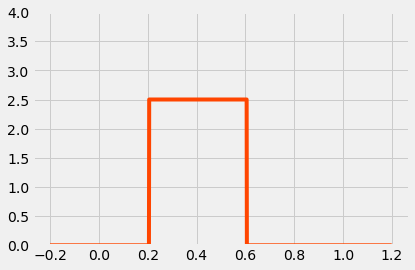

In [8]:
plt.ylim(top = 4)
x = .406  
h = .2
xvec=np.arange(-0.2,1.2,0.001) # we choose this xvec because we KNOW h=.2 and we KNOW beta dist is between 0 and 1
yvec=stats.uniform.pdf(xvec, x-h, 2*h) 
# parameters (xvalues, loc = left boundary, scale = width )
plt.plot(xvec, yvec, c='orangered')

In [9]:
### now write the same code as a function
### inputs are x and h
### function name = putaboxonit
### calling putaboxonit(.406, .2) should produce same plot as above
### your function should return yvec
### add inputs for top, color, etc. if you want 
...

Ellipsis

numpy.ndarray

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5,
       2.5, 2.5, 2.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ])

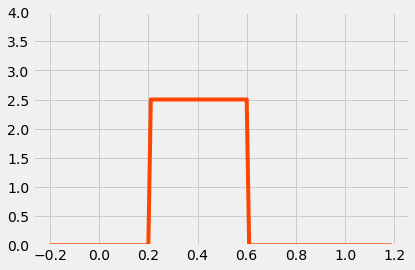

In [10]:
def putaboxonit(x,h):
    xvec=np.arange(-0.2,1.2,0.01)
    yvec=stats.uniform.pdf(xvec, x-h, 2*h) 
    # parameters (xvalues, loc = left boundary, scale = width )
    plt.ylim(top = 1.6 * yvec.max())
    plt.plot(xvec, yvec, c='orangered')
    return yvec

out = putaboxonit(.406, .2)
type(out)
out

## test your function with different values of x and h ...

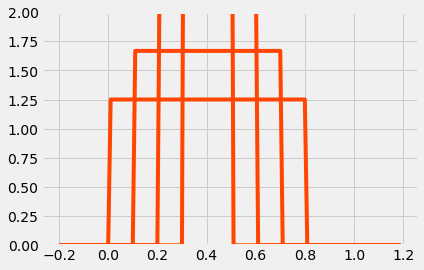

In [11]:
out = putaboxonit(.406, .1)
out = putaboxonit(.406, .2)
out = putaboxonit(.406, .3)
out = putaboxonit(.406, .4) # run them in the opposite order would frame it better

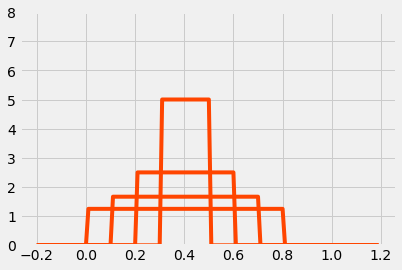

In [12]:
out = putaboxonit(.406, .4)
out = putaboxonit(.406, .3)
out = putaboxonit(.406, .2)
out = putaboxonit(.406, .1)

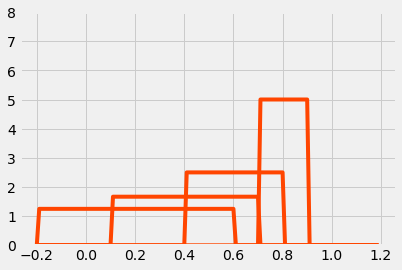

In [13]:
out = putaboxonit(.206, .4) # now try different x values
out = putaboxonit(.406, .3)
out = putaboxonit(.606, .2)
out = putaboxonit(.806, .1)

## next ...
Generate n=8 values from beta(5,2). 

Run putaboxonit() for each one to get 8 yvecs. 

Add these yvecs together.   Use a loop if you want.  In class we didn't. 

In [14]:
xdata = stats.beta.rvs(5,2, size = 8)
xdata

array([0.49600309, 0.7425097 , 0.77220873, 0.74077677, 0.84428264,
       0.76047906, 0.77553158, 0.74984782])

In [15]:
xdata[0]
xdata[1]

0.49600308598970483

0.7425096994514072

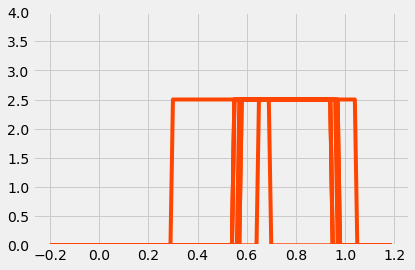

In [16]:
yout = putaboxonit(xdata[0], .2)
yout += putaboxonit(xdata[1], .2)
yout += putaboxonit(xdata[2], .2)
yout += putaboxonit(xdata[3], .2)
yout += putaboxonit(xdata[4], .2)
yout += putaboxonit(xdata[5], .2)
yout += putaboxonit(xdata[6], .2)
yout += putaboxonit(xdata[7], .2)
# we see the boxes on top of each other

### Now plot yout versus xvec 

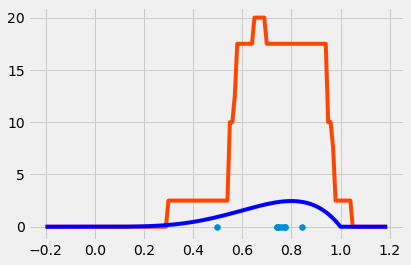

In [17]:
xvec=np.arange(-0.2,1.2,0.01)  # same grid as in the function
plt.plot(xvec, yout, c = 'orangered')
plt.scatter(xdata, np.zeros(8)) # plotting the data values on x axis, very similar to a rugplot
plt.plot(xvec, stats.beta.pdf(xvec, 5, 2), c = 'blue') # plot true pdf (the mother dist that generated the data)

### Area under orange curve = 8 because we added up 8 boxes.

### Area under blue curve = 1 because it is beta(5,2) pdf

### How to make orange curve have area = 1?  Divide yout by 8.  

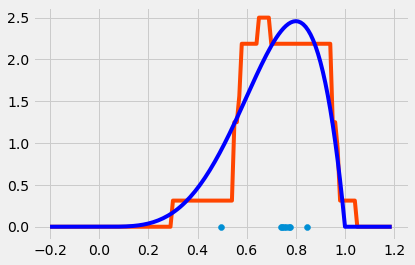

In [18]:
xvec=np.arange(-0.2,1.2,0.01)  
plt.plot(xvec, 1/len(xdata) * yout, c = 'orangered')
plt.scatter(xdata, np.zeros(8))
plt.plot(xvec, stats.beta.pdf(xvec, 5, 2), c = 'blue')

### Now the curves have the same area, both = 1

### Orange curve is an estimate of the blue curve, sometimes too high, sometimes too low, and in few places just right 

In [25]:
# suppose I have dat1 = [1.2, 3.33, -2.444, 9.982, 3.14159, ...]
dat1 = stats.expon.rvs(.1, size = 12)
dat1
datmin = 0 # who cares about the exact value of dat1.min()
datmax = dat1.max() # definitely care about this



array([0.37723988, 2.96275387, 0.56185448, 0.2538259 , 0.68477047,
       1.05899834, 0.34332359, 1.27639146, 1.39567293, 0.29953613,
       2.64676927, 1.99679557])

0.2538259014172807

2.9627538682388197

In [29]:
def putaboxonit(datvec, h):
    #xvec=np.arange(-0.2,1.2,0.01)
    xmin = datvec.min()
    xmax = datvec.max()
    nobs = len(datvec)
    xvec = np.arange(xmin - 2*h, xmax + 2*h, .001)
    
    yvec = np.zeros(len(xvec))
    for i in datvec:
        yvec += stats.uniform.pdf(xvec,i-h,2*h)
    yvec = 1/nobs * yvec
    
    plt.ylim(top = 1.6 * yvec.max())
    plt.plot(xvec, yvec, c='orangered')
    return yvec, xvec
    

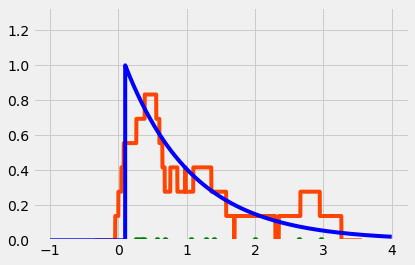

In [34]:
out = putaboxonit(dat1, .3)
xvec = np.arange(-1, 4, .001)
plt.plot(xvec, stats.expon.pdf(xvec, .1), c='blue')
plt.scatter(dat1, 0*dat1, c='green')

In [44]:
dat1 = stats.norm.rvs(0, 5, size = 12)

array([-1.17151873, -2.91154136, -2.02287268,  0.0573516 ,  2.02324519,
        1.58883317, -6.82531655,  5.20608681,  1.68001384, -0.8416091 ,
       -2.15422023, -6.15636201])

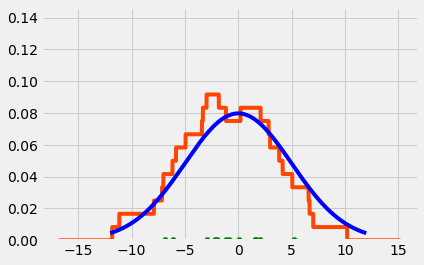

In [46]:
dat1
datmin = 0 # who cares about the exact value of dat1.min()
datmax = dat1.max() # definitely care about this

out = putaboxonit(dat1, 5)
xvec = np.arange(-12, 12, .001)
plt.plot(xvec, stats.norm.pdf(xvec, 0, 5), c='blue')
plt.scatter(dat1, 0*dat1, c='green')